# 1. Problem

#During the lab rounds, the csv file marketing customer analysis is used to analyze and understand the customer demographics and buying behavior

In [1]:
import pandas as pd
import numpy as np

# 2. Getting the data

In [2]:
#import the data file and show the dataframes shape
data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
display(data.shape)

(10910, 26)

# 3. Cleaning/Wrangling/EDA

In [3]:
#Standardize header names
#data
data = data.drop(['Unnamed: 0'],axis=1)

In [4]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [5]:
display(data.dtypes)
#Which columns are numerical?

#Customer Lifetime Value
#Income
#Monthly Premium Auto 
#Months Since Last Claim 
#Months Since Policy Inception
#Number of Open Complaints
#Number of Policies
#Total Claim Amount

#Which columns are categorical?

#Customer
#State 
#Response                       
#Coverage                        
#Education                         
#Effective To Date                 
#EmploymentStatus                  
#Gender
#Location Code                   
#Marital Status                  
#Policy Type                      
#Policy                          
#Renew Offer Type                  
#Sales Channel                     
#Vehicle Class                     
#Vehicle Size                      
#Vehicle Type                     

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [6]:
#Check with NaN values
display(data.isna().sum())

Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [7]:
#Deal with NaN values

#column state, replace nan values with Unknown:
#data['State'].unique()
data['State'] = data['State'].fillna('Unknown')
display(data['State'].unique())
display(data)

array(['Arizona', 'California', 'Washington', 'Oregon', 'Unknown',
       'Nevada'], dtype=object)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [8]:
#Deal with NaN values column Response:
data['Response'] = data['Response'].fillna('Unknown')
display(data['Response'].unique())
display(data)

array(['No', 'Yes', 'Unknown'], dtype=object)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [9]:
#Deal with NaN values column Months since last claim:
#data['Months Since Last Claim'].unique()
data['Months Since Last Claim'] = data['Months Since Last Claim'].fillna(0)
display(data['Months Since Last Claim'].unique())

array([ 7.,  3., 34., 10.,  0.,  2.,  8., 35., 33., 19., 13.,  5., 24.,
       25.,  6., 20., 26., 14.,  9., 29., 11.,  1., 18., 16., 30., 12.,
        4., 22., 31., 21., 28., 17., 15., 32., 23., 27.])

In [10]:
#Deal with NaN values column Number of Open Complaints:
data['Number of Open Complaints'] = data['Number of Open Complaints'].fillna(0)
display(data['Number of Open Complaints'].unique())

array([0., 3., 1., 2., 4., 5.])

In [11]:
#Deal with NaN values columns Vehicle Class, Vehicle Size and Vehicle Type:
data['Vehicle Class'] = data['Vehicle Class'].fillna('Unknown')
display(data['Vehicle Class'].unique())
data['Vehicle Size'] = data['Vehicle Size'].fillna('Unknown')
display(data['Vehicle Size'].unique())
data['Vehicle Type'] = data['Vehicle Type'].fillna('Unknown')
display(data['Vehicle Type'].unique())

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', 'Unknown'], dtype=object)

array(['Medsize', 'Small', 'Large', 'Unknown'], dtype=object)

array(['Unknown', 'A'], dtype=object)

In [12]:
#Ckecking of remaining nan values in data:
display(data.isna().sum())

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Vehicle Type                     0
dtype: int64

In [13]:
#Datetime format
#Converting the Effective To Date column from object to datetime
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'], errors='coerce')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown


In [14]:
#Extract the months from the dataset and store in a separate column.
#display(data.dtypes)
data['Months'] = data['Effective To Date'].dt.month
display(data.columns)
display(data.head())

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type', 'Months'],
      dtype='object')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Months
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1


In [15]:
#Filter data to show only data from January and February:
filtered_data = data[data['Months'].isin([1, 2])]
filtered_data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Months
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


### START OF ROUND 3

#### Data Exploration

In [17]:
#Show DataFrame info.
data.info

<bound method DataFrame.info of       Customer       State  Customer Lifetime Value Response  Coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877     Unknown              6857.519928  Unknown     Basic   

      Education Effective To Date EmploymentStatus Gender  Income  ...  \
0    

In [18]:
#Describe DataFrame.
data.describe(include='all').T

C:\Users\lisab\AppData\Local\Temp\ipykernel_14588\1583328508.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Customer,10910,9134,ID89933,7,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,10910,6,California,3552,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,10910.0,NaN,NaN,NaN,NaT,NaT,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.38119
Response,10910,3,No,8813,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,10910,3,Basic,6660,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,10910,5,Bachelor,3272,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,10910,59,2011-01-10 00:00:00,239,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,10910,5,Employed,6789,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10910,2,F,5573,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,10910.0,NaN,NaN,NaN,NaT,NaT,37536.284785,30359.19567,0.0,0.0,33813.5,62250.75,99981.0


In [19]:
#Show a plot of the total number of responses.
import matplotlib.pyplot as plt
import seaborn as sns

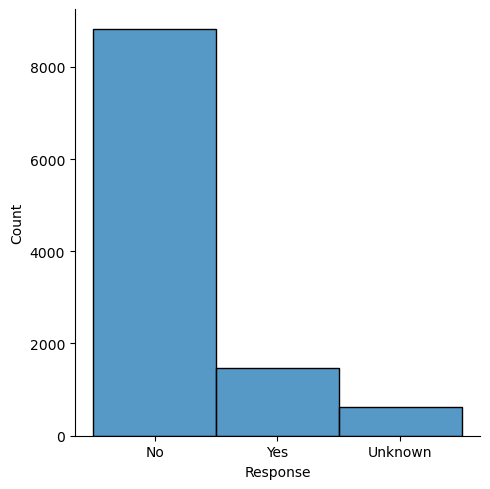

In [20]:
#First step: show a plot about the Yes/No/Unknown counts of responses
sns.displot(data['Response'], bins=40) 
plt.show()

In [21]:
data['Response_numbers'] = np.where(data['Response']=='Yes', 1, 0)
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Months,Response_numbers
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown,2,0
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0


In [22]:
total_responses = data['Response_numbers'].sum()
total_responses

1466

C:\Users\lisab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


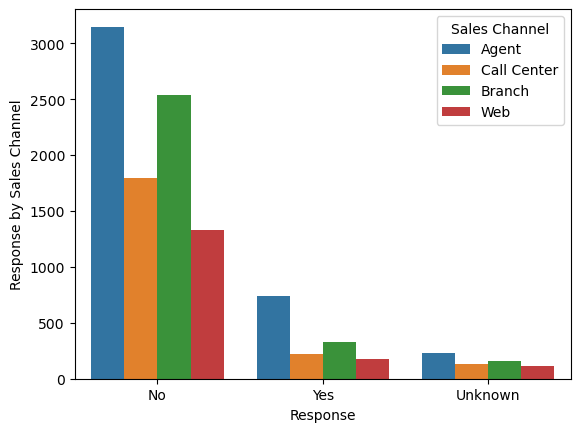

In [75]:
#Show a plot of the response rate by the sales channel.
sns.countplot('Response', hue='Sales Channel', data=data) 
plt.ylabel('Response by Sales Channel')
plt.show()

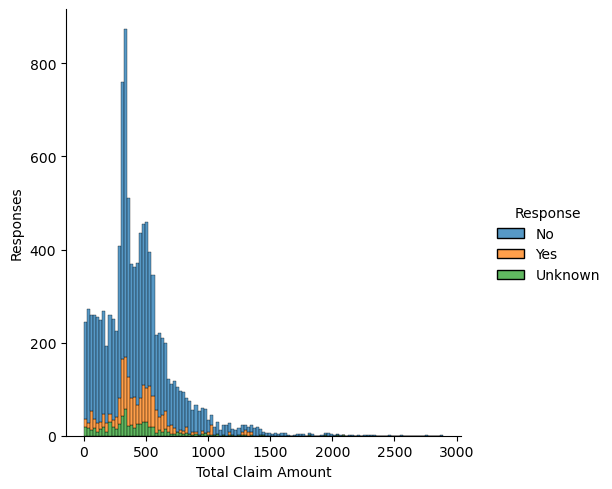

In [76]:
#Show a plot of the response rate by the total claim amount.
sns.displot(data=data, x="Total Claim Amount", hue="Response", multiple="stack", kind="hist")
plt.ylabel('Responses')
plt.show()

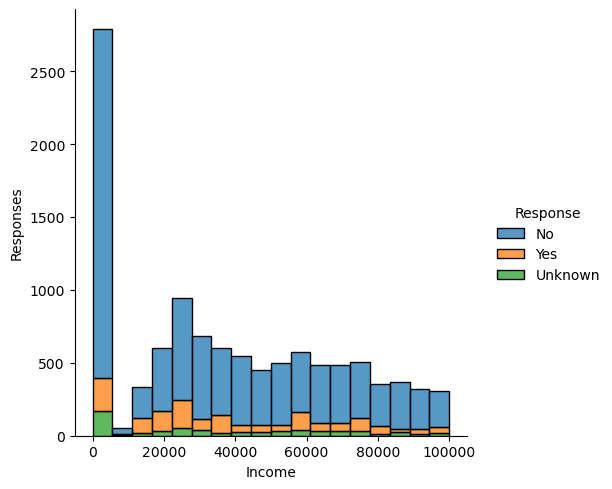

In [77]:
#Show a plot of the response rate by income.
sns.displot(data=data, x="Income", hue="Response", multiple="stack", kind="hist")
plt.ylabel('Responses')
plt.show()

### START OF ROUND 4 lab

#### Check the data types of the columns and separate the numerical data

In [28]:
numerical = data._get_numeric_data()
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Months,Response_numbers
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
4,9025.067525,23675,117,0.0,31,0.0,7,707.925645,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,0.0,40,0.0,7,1214.400000,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2,0


#### Check the data types of the columns and separate the categorical data

In [29]:
X_categoricals = data.select_dtypes('object')
X_categoricals

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Unknown
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,Unknown
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


#### Check normality of numerical variables visually

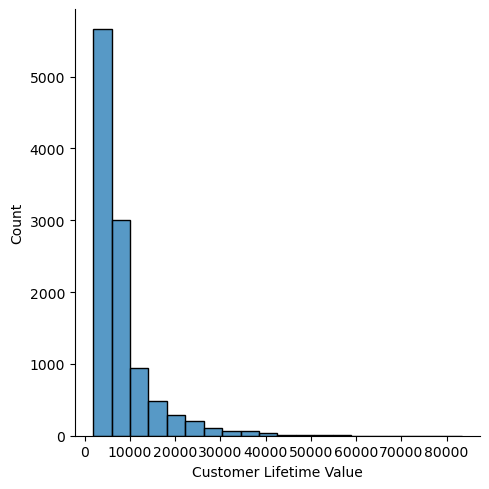

None

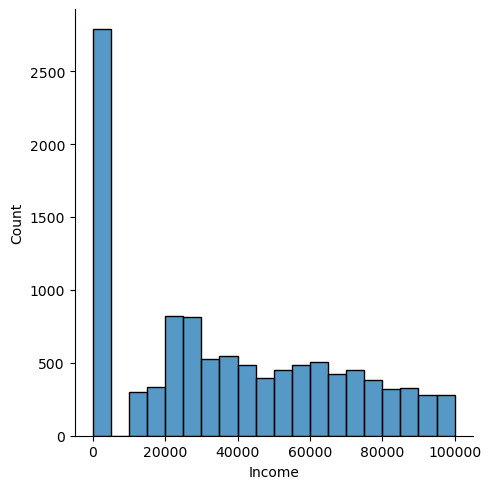

None

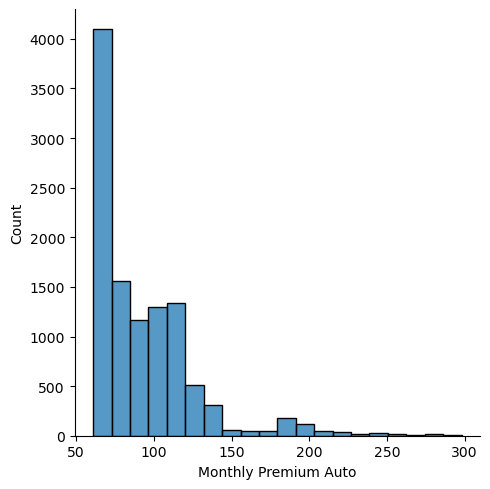

None

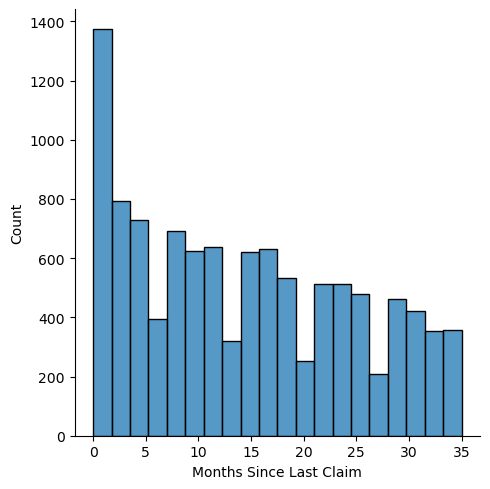

None

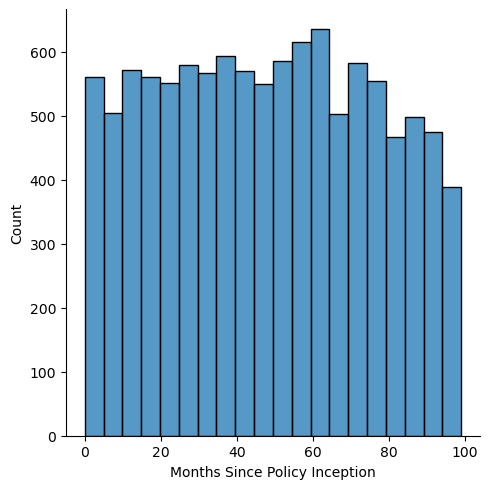

None

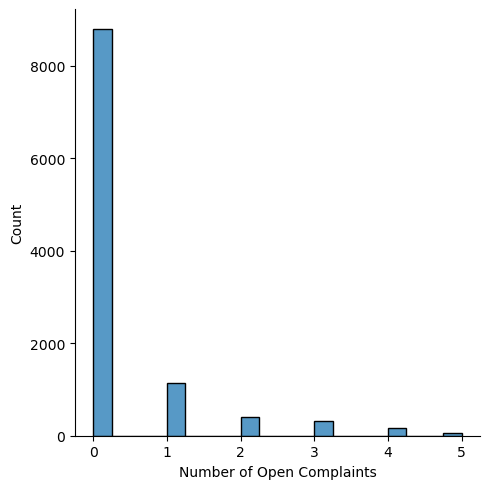

None

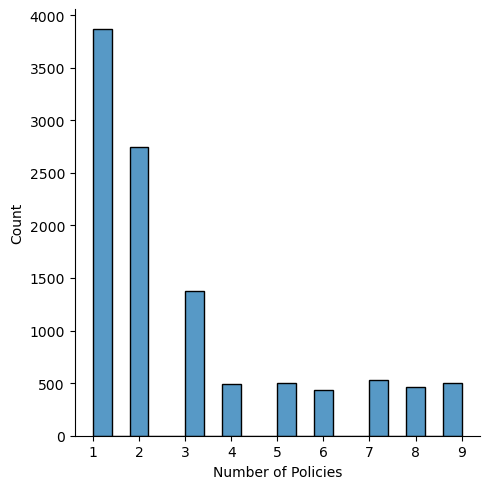

None

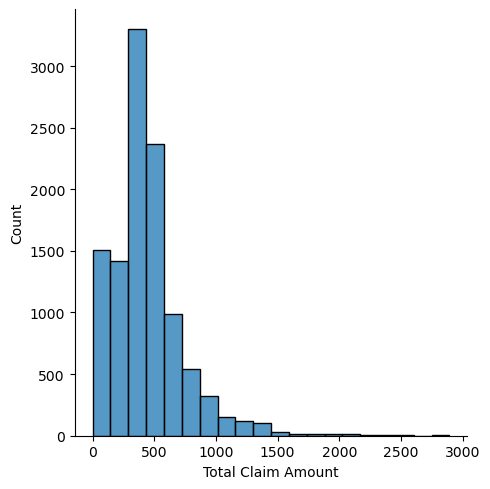

None

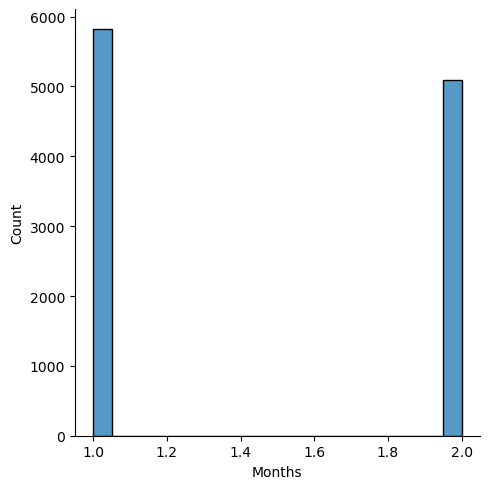

None

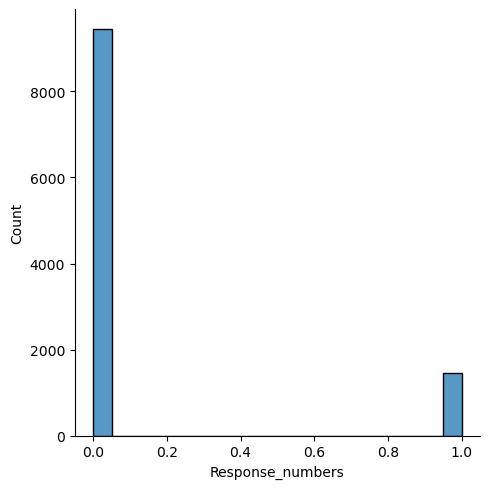

None

In [30]:
#Customer Lifetime Value
sns.displot(numerical['Customer Lifetime Value'], bins=20)
display(plt.show())
#Answer: No normally distributed data

#Income
sns.displot(numerical['Income'], bins=20)
display(plt.show())
#Answer: No normally distributed data

#Monthly Premium Auto
sns.displot(numerical['Monthly Premium Auto'], bins=20)
display(plt.show())
#Answer:No normally distributed data

#Months Since Last Claim
sns.displot(numerical['Months Since Last Claim'], bins=20)
display(plt.show())
#Answer: No normally distributed data

#Months Since Policy Inception
sns.displot(numerical['Months Since Policy Inception'], bins=20)
display(plt.show())
#Answer:No normally distributed data

#Number of Open Complaints
sns.displot(numerical['Number of Open Complaints'], bins=20)
display(plt.show())
#Answer: No normally distributed data

#Number of Policies
sns.displot(numerical['Number of Policies'], bins=20)
display(plt.show())
#Answer: No normally distributed data

#Total Claim Amount
sns.displot(numerical['Total Claim Amount'], bins=20)
display(plt.show())
#Answer: No normally distributed data

#Months
sns.displot(numerical['Months'], bins=20)
display(plt.show())
#Answer: No normally distributed data

#Response_numbers
sns.displot(numerical['Response_numbers'], bins=20)
display(plt.show())
#Answer: No normally distributed data


#### For the numerical variables, check the multicollinearity between the features

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Months,Response_numbers
Customer Lifetime Value,1.000000,0.028306,0.403069,0.017189,0.016960,-0.030616,0.016024,0.232626,-0.009234,-0.007765
Income,0.028306,1.000000,-0.009788,-0.016671,-0.005903,0.008425,-0.009960,-0.354141,-0.000443,0.011156
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.007845,0.018953,-0.010059,-0.020505,0.631799,0.007253,0.013918
Months Since Last Claim,0.017189,-0.016671,0.007845,1.000000,-0.036081,0.036455,-0.000649,0.007210,-0.022099,-0.011572
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.036081,1.000000,0.004165,-0.009123,0.003095,0.015163,-0.004875
Number of Open Complaints,-0.030616,0.008425,-0.010059,0.036455,0.004165,1.000000,0.001681,-0.012380,-0.005802,-0.004419
Number of Policies,0.016024,-0.009960,-0.020505,-0.000649,-0.009123,0.001681,1.000000,-0.008923,0.005127,-0.018650
Total Claim Amount,0.232626,-0.354141,0.631799,0.007210,0.003095,-0.012380,-0.008923,1.000000,0.001425,0.016416
Months,-0.009234,-0.000443,0.007253,-0.022099,0.015163,-0.005802,0.005127,0.001425,1.000000,-0.032981
Response_numbers,-0.007765,0.011156,0.013918,-0.011572,-0.004875,-0.004419,-0.018650,0.016416,-0.032981,1.000000


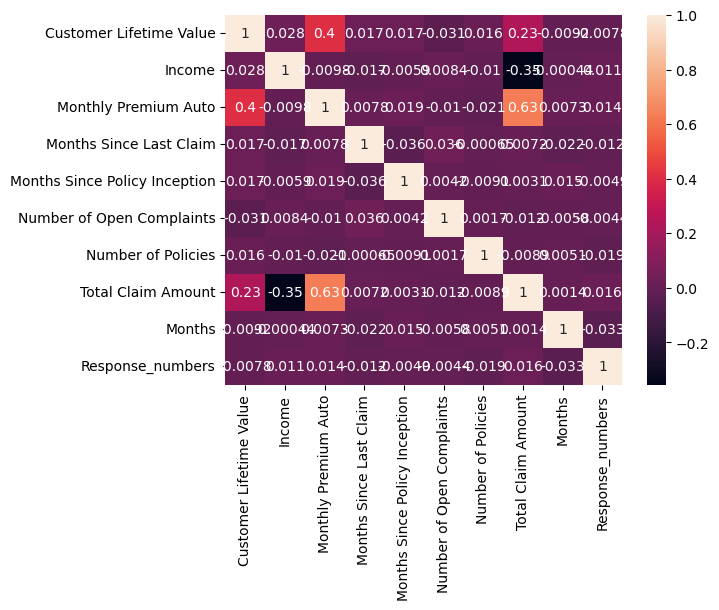

In [31]:
#Please note that we will use the column total_claim_amount later as the target variable.
correlations_matrix = numerical.corr()
display(correlations_matrix)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### START OF ROUND 5 lab

#### Performing X-y split of data and normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

#Perform X-y split of the data

y = numerical['Total Claim Amount']
X = numerical.drop(['Total Claim Amount'], axis=1)

#Normalizing data with MinMaxScaler
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
X_numerical_norm = pd.DataFrame(x_normalized, columns=X.columns)
X_numerical_norm

(10910, 9)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Months,Response_numbers
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0
4,0.087527,0.236795,0.236287,0.000000,0.313131,0.0,0.750,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.000000,0.404040,0.0,0.750,0.0,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0,0.0


# Start of Round 6


#### Transformation of categorical data into multiple numerical columns with OneHot Encoder

In [34]:
#Transforming the categoricals into multiple numerical columns: 
#OneHot Encoder for categoricals
from sklearn.preprocessing import OneHotEncoder

X_categoricals = X_categoricals.drop(['Customer'], axis=1)
encoder = OneHotEncoder(drop='first').fit(X_categoricals)
all_columns = encoder.get_feature_names_out(input_features=X_categoricals.columns)
X_categoricals_encode = pd.DataFrame(encoder.transform(X_categoricals).toarray(), columns=all_columns)
X_categoricals_encode.head()


,State_California,State_Nevada,State_Oregon,State_Unknown,State_Washington,Response_Unknown,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown,Vehicle Type_Unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### Concatenation of numericals and categoricals

In [35]:
#Concatenate Numericals and Categoricals
X = pd.concat([X_numerical_norm, X_categoricals_encode], axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Months,Response_numbers,State_California,...,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown,Vehicle Type_Unknown
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.087527,0.236795,0.236287,0.000000,0.313131,0.0,0.750,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.000000,0.404040,0.0,0.750,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Linear Regression

#### Train-test split

In [36]:
#Performing Train-test split 
#we already have our y, this was the total claim amount column
#y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 57)
(2182, 57)
(8728,)
(2182,)


#### Training of the model

In [38]:
import math
from sklearn import linear_model
#Training the model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

#### Predictions with training data and r2 score

In [39]:
from sklearn.metrics import r2_score
#Make predictions with the training data and calculate the r2 with predictions and y_train results
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.766666960060683

### Model Validation

#### Testing of the model and r2 score with test data

In [40]:
#Testing the model with test data:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7868991381890169

#### Mean squared error

In [41]:
from sklearn.metrics import mean_squared_error
#Calculating the mean squared error
mse=mean_squared_error(y_test,predictions_test)
mse

17830.645804723452

#### Root mean squared error

In [42]:
#Calculating the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

133.5314412590662

#### Mean absolute error

In [43]:
from sklearn.metrics import mean_absolute_error
#Calculating the mean absolute error
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

94.50756376732821


## Start of Round 7

#### Check Multicollinearity of all features (numerical + categorical)

In [44]:
#First step: Look at multicollinearity of complete X dataset to check if insignificant variables exist
correlations_matrix_X = X.corr()
display(correlations_matrix_X)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Months,Response_numbers,State_California,...,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown,Vehicle Type_Unknown
Customer Lifetime Value,1.000000,0.028306,0.403069,0.017189,0.016960,-0.030616,0.016024,-0.009234,-0.007765,-0.004454,...,0.163260,0.184293,0.166015,0.098242,-0.097923,0.017938,0.005636,0.000297,0.017938,-0.007604
Income,0.028306,1.000000,-0.009788,-0.016671,-0.005903,0.008425,-0.009960,-0.000443,0.011156,-0.001376,...,0.000998,-0.006971,-0.020260,-0.010193,0.022831,-0.002690,0.017520,-0.002497,-0.002690,-0.000257
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.007845,0.018953,-0.010059,-0.020505,0.007253,0.013918,0.005342,...,0.453640,0.484831,0.373048,0.191117,-0.234766,-0.004923,0.016344,-0.005328,-0.004923,-0.022030
Months Since Last Claim,0.017189,-0.016671,0.007845,1.000000,-0.036081,0.036455,-0.000649,-0.022099,-0.011572,-0.003449,...,0.005904,0.002050,-0.012709,-0.007029,0.015455,0.005357,0.013591,-0.013043,0.005357,-0.006868
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.036081,1.000000,0.004165,-0.009123,0.015163,-0.004875,-0.017878,...,0.011009,0.011704,-0.020970,0.023382,0.002142,0.010001,-0.006015,0.004637,0.010001,-0.003576
Number of Open Complaints,-0.030616,0.008425,-0.010059,0.036455,0.004165,1.000000,0.001681,-0.005802,-0.004419,-0.002349,...,0.001544,-0.000217,-0.012550,-0.016039,0.000356,-0.003615,-0.000563,-0.002576,-0.003615,-0.005617
Number of Policies,0.016024,-0.009960,-0.020505,-0.000649,-0.009123,0.001681,1.000000,0.005127,-0.018650,0.001623,...,-0.003255,-0.008569,-0.013213,0.005840,-0.006272,-0.005941,0.006301,0.011421,-0.005941,-0.008094
Months,-0.009234,-0.000443,0.007253,-0.022099,0.015163,-0.005802,0.005127,1.000000,-0.032981,-0.009338,...,-0.005287,-0.000107,0.015607,0.006130,-0.023471,-0.007373,0.001462,0.005934,-0.007373,-0.006100
Response_numbers,-0.007765,0.011156,0.013918,-0.011572,-0.004875,-0.004419,-0.018650,-0.032981,1.000000,0.015319,...,-0.027389,0.007960,0.025393,0.027141,-0.007203,0.002806,0.011765,-0.039280,0.002806,0.007188
State_California,-0.004454,-0.001376,0.005342,-0.003449,-0.017878,-0.002349,0.001623,-0.009338,0.015319,1.000000,...,0.002694,0.000402,0.006026,0.008882,-0.014620,0.004635,0.006327,-0.008690,0.004635,0.010254


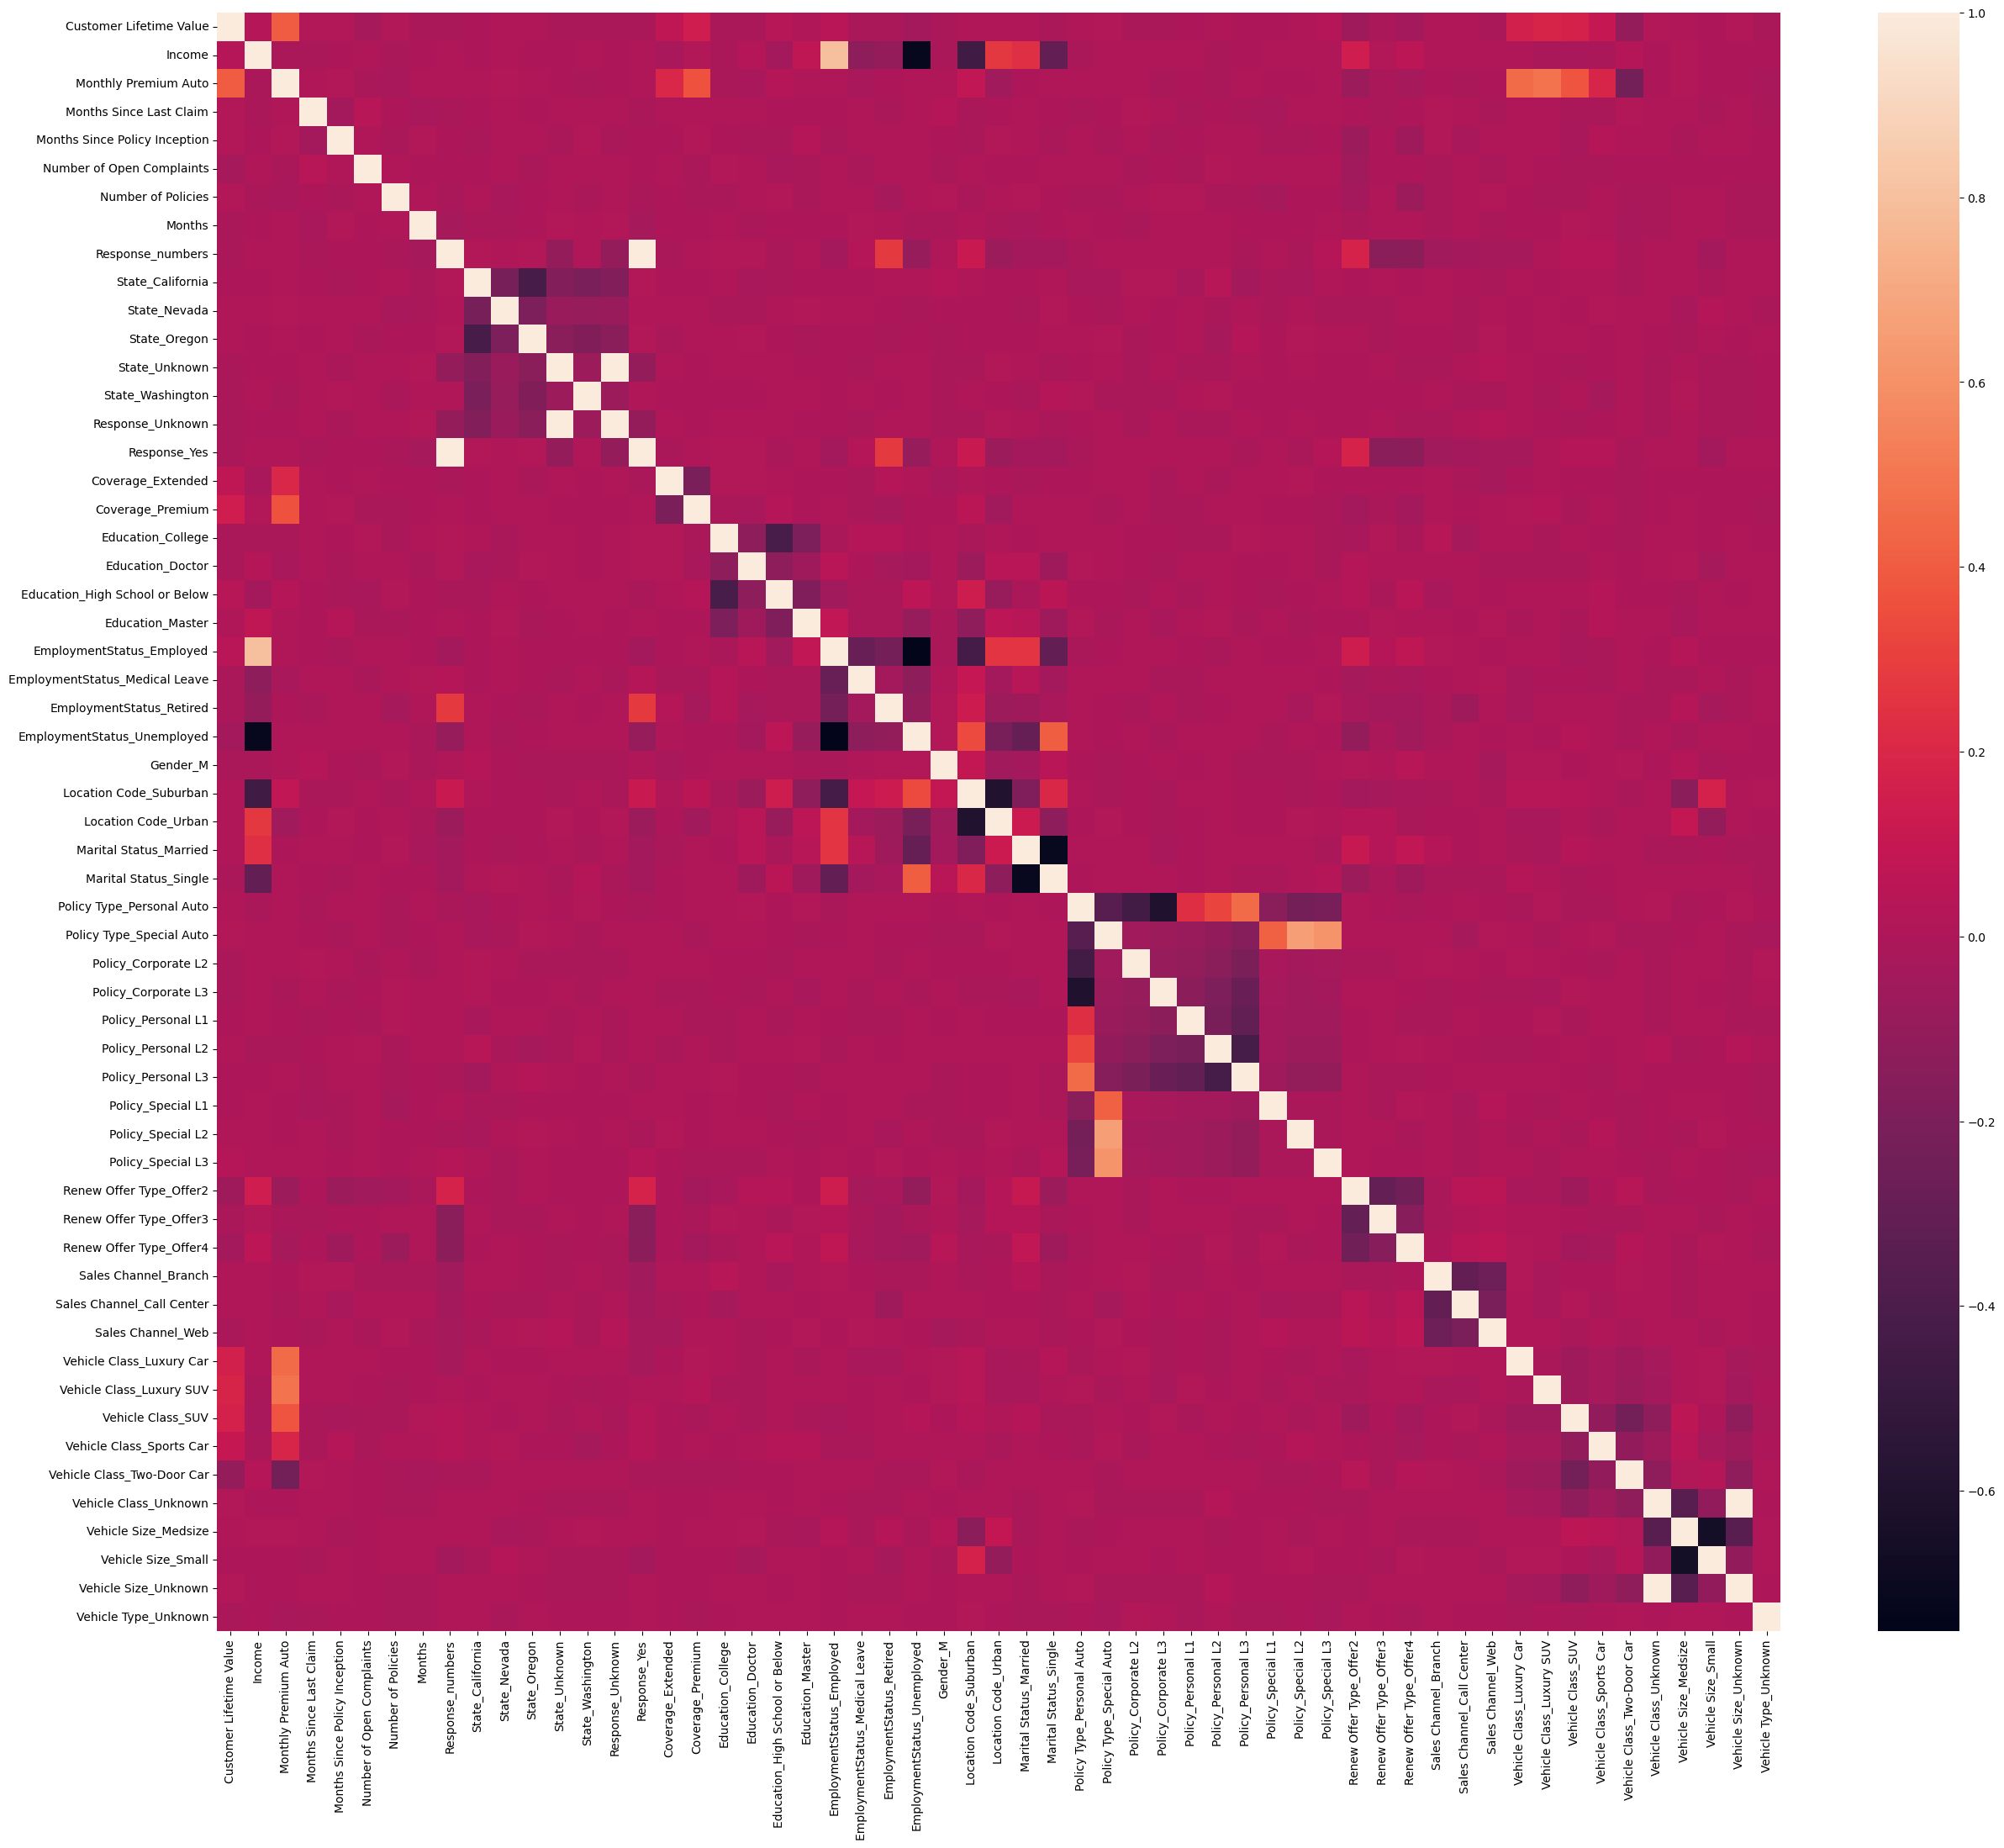

In [46]:
#Better way to see all correlations and decide which features will be dropped: Heatmap
fig, ax = plt.subplots()
fig.set_size_inches(30, 25)

sns.heatmap(correlations_matrix_X)
plt.show()

In [47]:
#Alternative approach: Detecting Multicollinearity between categorical features with VIF (Variance Inflation Factor). It regresses each feature against all of the other features.
#Greater VIF states greater correlation. If VIF if above 5, this indicates a high multicollinearity
#Reference for info and code: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/


from statsmodels.stats.outliers_influence import variance_inflation_factor

  
# VIF dataframe
vif_data = pd.DataFrame()
print(vif_data)
vif_data["feature"] = X_categoricals_encode.columns
print(vif_data["feature"])
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_categoricals_encode.values, i)
                          for i in range(len(X_categoricals_encode.columns))]
  
print(vif_data)

Empty DataFrame
Columns: []
Index: []
0                   State_California
1                       State_Nevada
2                       State_Oregon
3                      State_Unknown
4                   State_Washington
5                   Response_Unknown
6                       Response_Yes
7                  Coverage_Extended
8                   Coverage_Premium
9                  Education_College
10                  Education_Doctor
11    Education_High School or Below
12                  Education_Master
13         EmploymentStatus_Employed
14    EmploymentStatus_Medical Leave
15          EmploymentStatus_Retired
16       EmploymentStatus_Unemployed
17                          Gender_M
18            Location Code_Suburban
19               Location Code_Urban
20            Marital Status_Married
21             Marital Status_Single
22         Policy Type_Personal Auto
23          Policy Type_Special Auto
24               Policy_Corporate L2
25               Policy_Corporate L3


C:\Users\lisab\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                           feature           VIF
0                 State_California  2.709833e+00
1                     State_Nevada  1.480942e+00
2                     State_Oregon  2.401942e+00
3                    State_Unknown  6.009975e+05
4                 State_Washington  1.432159e+00
5                 Response_Unknown  7.133901e+05
6                     Response_Yes  1.389475e+00
7                Coverage_Extended  1.490769e+00
8                 Coverage_Premium  1.162864e+00
9                Education_College  1.962173e+00
10                Education_Doctor  1.131145e+00
11  Education_High School or Below  1.978216e+00
12                Education_Master  1.278659e+00
13       EmploymentStatus_Employed  1.134726e+01
14  EmploymentStatus_Medical Leave  1.760849e+00
15        EmploymentStatus_Retired  1.590180e+00
16     EmploymentStatus_Unemployed  5.498389e+00
17                        Gender_M  1.990105e+00
18          Location Code_Suburban  4.902388e+00
19             Locat

In [48]:
#According to heatmap (and VIF), these features will be dropped because they highly correlate with other features (corr. above 0.9):
X_optimized = X.drop(['EmploymentStatus_Unemployed', 'EmploymentStatus_Employed', 'Response_numbers', 'Response_Unknown', 'Location Code_Urban', 'Marital Status_Married', 'Policy Type_Personal Auto', 'Vehicle Class_Unknown', 'Vehicle Size_Medsize'], axis=1)

In [49]:
X_optimized

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Months,State_California,State_Nevada,...,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Small,Vehicle Size_Unknown,Vehicle Type_Unknown
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.087527,0.236795,0.236287,0.000000,0.313131,0.0,0.750,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.000000,0.404040,0.0,0.750,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Model Improvement approach: X with reduced number of features (highly correlating features were removed)

In [50]:
#Calculating Model again after removing highly correlated features:
#we already have our y, this was the total claim amount column
#y
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X_optimized, y, test_size=0.2)

In [51]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(8728, 48)
(2182, 48)
(8728,)
(2182,)


In [52]:
import math
from sklearn import linear_model
#Training the model
lm2 = linear_model.LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression()

In [53]:
from sklearn.metrics import r2_score
#Make predictions with the training data and calculate the r2 with predictions and y_train results
predictions2 = lm2.predict(X2_train)
r2_score(y2_train, predictions2)

0.7123136232262073

In [54]:
#Testing the model with test data:
predictions_test2 = lm2.predict(X2_test)
r2_score(y2_test, predictions_test2)

0.720990576864578

In [55]:
from sklearn.metrics import mean_squared_error
#Calculating the mean squared error
mse2=mean_squared_error(y2_test,predictions_test2)
mse2

24760.01360393085

In [56]:
#Calculating the root mean squared error
rmse2 = np.sqrt(mean_squared_error(y2_test,predictions_test2))
rmse2

157.35314932956013

In [57]:
from sklearn.metrics import mean_absolute_error
#Calculating the mean absolute error
mae2 = mean_absolute_error(y2_test, predictions_test2)
print(mae2)

113.48240874711458


#### Conclusion: Model got worse after removing highly correlating features...

#### Next approach: Use original X (all features) but use different ratio of train test split

In [59]:
#Next try: Use original X(without removing features) and use different ratio of train test split: 0.4 instead of 0.2
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.4)
import math
from sklearn import linear_model
#Training the model
lm3 = linear_model.LinearRegression()
lm3.fit(X3_train,y3_train)
from sklearn.metrics import r2_score
#Make predictions with the training data and calculate the r2 with predictions and y_train results
predictions3 = lm3.predict(X3_train)
display(r2_score(y3_train, predictions3))
#Testing the model with test data:
predictions_test3 = lm3.predict(X3_test)
display(r2_score(y3_test, predictions_test3))
from sklearn.metrics import mean_squared_error
#Calculating the mean squared error
mse3=mean_squared_error(y3_test,predictions_test3)
display(mse3)
#Calculating the root mean squared error
rmse3 = np.sqrt(mean_squared_error(y3_test,predictions_test3))
display(rmse3)
from sklearn.metrics import mean_absolute_error
#Calculating the mean absolute error
mae3 = mean_absolute_error(y3_test, predictions_test3)
print(mae3)

0.7756647214576531

0.7621637142249953

21024.93330663626

144.99977002270128

98.5345437788808


#### Conclusion: No significant change to first Model with train test split of 0.2

#### Next approach: Use log transformation on numericals to achieve a more normal distribution

In [61]:
#Next approach: use the transformation on numerical columns which align it more towards a normal distribution. Concatenate 
#afterwards with Categoricals without removing any features.
Numericals_X = numerical.drop(['Total Claim Amount'], axis=1)
Numericals_X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Months,Response_numbers
0,4809.216960,48029,61,7.0,52,0.0,9,2,0
1,2228.525238,0,64,3.0,26,0.0,1,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,1,1
4,9025.067525,23675,117,0.0,31,0.0,7,1,0
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,0.0,40,0.0,7,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,2,0


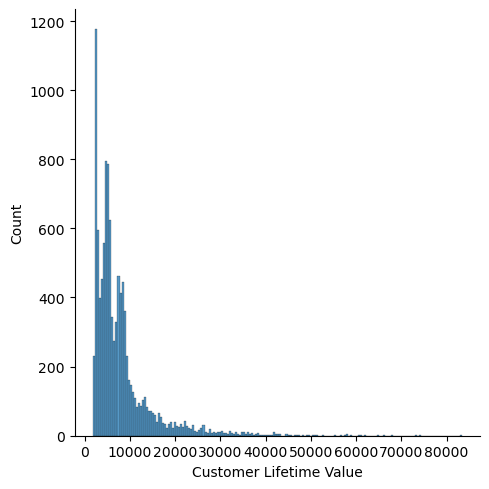

In [62]:
sns.displot(Numericals_X['Customer Lifetime Value'])
plt.show()

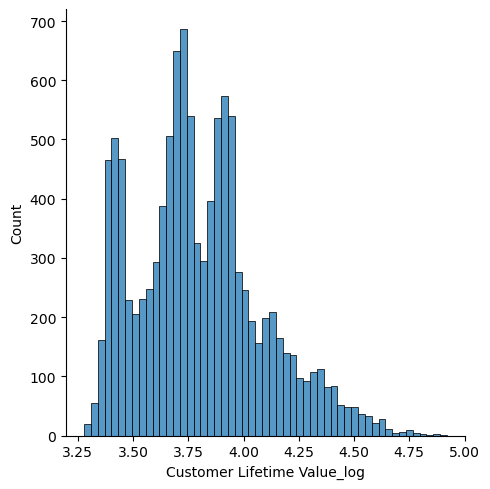

In [63]:
def log_transform_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later
Numericals_X['Customer Lifetime Value_log'] = list(map(log_transform_clean2, Numericals_X['Customer Lifetime Value']))
# Now we replace the NAN by the mean
Numericals_X['Customer Lifetime Value_log'] = Numericals_X['Customer Lifetime Value_log'].fillna(np.mean(Numericals_X['Customer Lifetime Value_log']))
sns.displot(Numericals_X['Customer Lifetime Value_log'])
plt.show()


C:\Users\lisab\AppData\Local\Temp\ipykernel_14588\1843459769.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


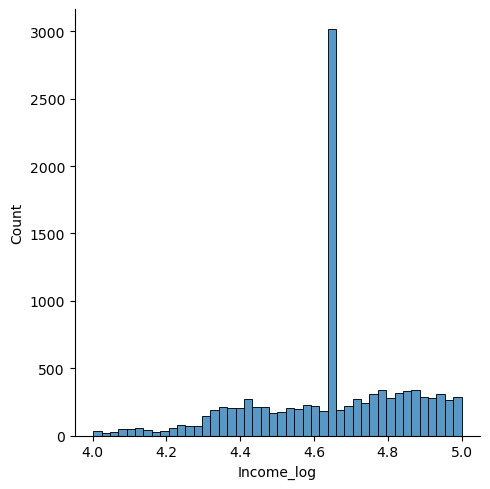

In [64]:
Numericals_X['Income_log'] = list(map(log_transform_clean2, Numericals_X['Income']))
# Now we replace the NAN by the mean
Numericals_X['Income_log'] = Numericals_X['Income_log'].fillna(np.mean(Numericals_X['Income_log']))
sns.displot(Numericals_X['Income_log'])
plt.show()

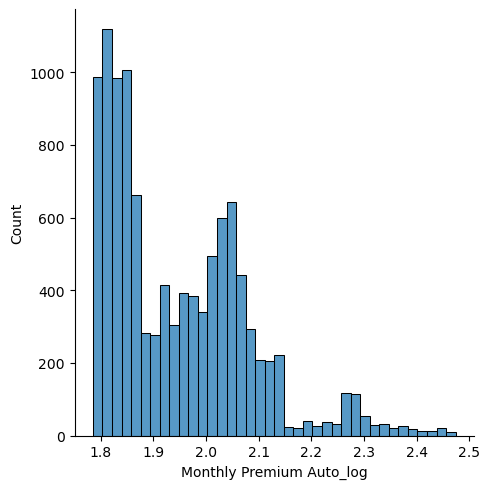

In [65]:
Numericals_X['Monthly Premium Auto_log'] = list(map(log_transform_clean2, Numericals_X['Monthly Premium Auto']))
# Now we replace the NAN by the mean
Numericals_X['Monthly Premium Auto_log'] = Numericals_X['Monthly Premium Auto_log'].fillna(np.mean(Numericals_X['Monthly Premium Auto_log']))
sns.displot(Numericals_X['Monthly Premium Auto_log'])
plt.show()

C:\Users\lisab\AppData\Local\Temp\ipykernel_14588\1843459769.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


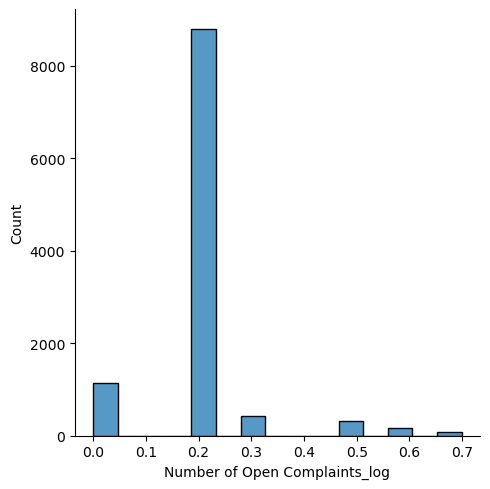

In [66]:
Numericals_X['Number of Open Complaints_log'] = list(map(log_transform_clean2, Numericals_X['Number of Open Complaints']))
# Now we replace the NAN by the mean
Numericals_X['Number of Open Complaints_log'] = Numericals_X['Number of Open Complaints_log'].fillna(np.mean(Numericals_X['Number of Open Complaints_log']))
sns.displot(Numericals_X['Number of Open Complaints_log'])
plt.show()

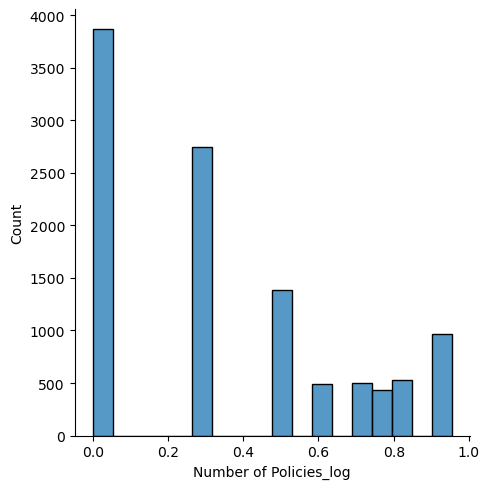

In [67]:
Numericals_X['Number of Policies_log'] = list(map(log_transform_clean2, Numericals_X['Number of Policies']))
# Now we replace the NAN by the mean
Numericals_X['Number of Policies_log'] = Numericals_X['Number of Policies_log'].fillna(np.mean(Numericals_X['Number of Policies_log']))
sns.displot(Numericals_X['Number of Policies_log'])
plt.show()

In [68]:
Numericals_X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Months,Response_numbers,Customer Lifetime Value_log,Income_log,Monthly Premium Auto_log,Number of Open Complaints_log,Number of Policies_log
0,4809.216960,48029,61,7.0,52,0.0,9,2,0,3.682074,4.681504,1.785330,0.201552,0.954243
1,2228.525238,0,64,3.0,26,0.0,1,1,0,3.348018,4.644014,1.806180,0.201552,0.000000
2,14947.917300,22139,100,34.0,31,0.0,2,2,0,4.174581,4.345158,2.000000,0.201552,0.301030
3,22332.439460,49078,97,10.0,3,0.0,2,1,1,4.348936,4.690887,1.986772,0.201552,0.301030
4,9025.067525,23675,117,0.0,31,0.0,7,1,0,3.955450,4.374290,2.068186,0.201552,0.845098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,0.0,40,0.0,7,1,0,4.192104,4.644014,2.403121,0.201552,0.845098
10906,5259.444853,61146,65,7.0,68,0.0,6,1,0,3.720940,4.786368,1.812913,0.201552,0.778151
10907,23893.304100,39837,201,11.0,63,0.0,2,2,0,4.378276,4.600287,2.303196,0.201552,0.301030
10908,11971.977650,64195,158,0.0,27,4.0,6,2,0,4.078166,4.807501,2.198657,0.602060,0.778151


In [69]:
#Drop the non log columns to keep just the log values:
Numericals_X = Numericals_X.drop(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies'], axis=1)
Numericals_X

,Months Since Last Claim,Months Since Policy Inception,Months,Response_numbers,Customer Lifetime Value_log,Income_log,Monthly Premium Auto_log,Number of Open Complaints_log,Number of Policies_log
0,7.0,52,2,0,3.682074,4.681504,1.785330,0.201552,0.954243
1,3.0,26,1,0,3.348018,4.644014,1.806180,0.201552,0.000000
2,34.0,31,2,0,4.174581,4.345158,2.000000,0.201552,0.301030
3,10.0,3,1,1,4.348936,4.690887,1.986772,0.201552,0.301030
4,0.0,31,1,0,3.955450,4.374290,2.068186,0.201552,0.845098
...,...,...,...,...,...,...,...,...,...
10905,0.0,40,1,0,4.192104,4.644014,2.403121,0.201552,0.845098
10906,7.0,68,1,0,3.720940,4.786368,1.812913,0.201552,0.778151
10907,11.0,63,2,0,4.378276,4.600287,2.303196,0.201552,0.301030
10908,0.0,27,2,0,4.078166,4.807501,2.198657,0.602060,0.778151


In [70]:
#Scale columns before concatenating with categoricals and doing linear regression:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler


#Normalizing data with MinMaxScaler
transformer = MinMaxScaler().fit(Numericals_X)
x_normalized = transformer.transform(Numericals_X)
print(x_normalized.shape)
X_numerical_norm_new = pd.DataFrame(x_normalized, columns=Numericals_X.columns)
X_numerical_norm_new

(10910, 9)


,Months Since Last Claim,Months Since Policy Inception,Months,Response_numbers,Customer Lifetime Value_log,Income_log,Monthly Premium Auto_log,Number of Open Complaints_log,Number of Policies_log
0,0.200000,0.525253,1.0,0.0,0.245833,0.681048,0.000000,0.288356,1.000000
1,0.085714,0.262626,0.0,0.0,0.042448,0.643496,0.030266,0.288356,0.000000
2,0.971429,0.313131,1.0,0.0,0.545689,0.344134,0.311619,0.288356,0.315465
3,0.285714,0.030303,0.0,1.0,0.651843,0.690447,0.292417,0.288356,0.315465
4,0.000000,0.313131,0.0,0.0,0.412275,0.373316,0.410599,0.288356,0.885622
...,...,...,...,...,...,...,...,...,...
10905,0.000000,0.404040,0.0,0.0,0.556357,0.643496,0.896796,0.288356,0.885622
10906,0.200000,0.686869,0.0,0.0,0.269496,0.786090,0.040041,0.288356,0.815465
10907,0.314286,0.636364,1.0,0.0,0.669706,0.599694,0.751744,0.288356,0.315465
10908,0.000000,0.272727,1.0,0.0,0.486988,0.807259,0.599993,0.861353,0.815465


In [71]:
#Concatenating with categoricals:
X_new = pd.concat([X_numerical_norm_new, X_categoricals_encode], axis=1)
X_new

,Months Since Last Claim,Months Since Policy Inception,Months,Response_numbers,Customer Lifetime Value_log,Income_log,Monthly Premium Auto_log,Number of Open Complaints_log,Number of Policies_log,State_California,...,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown,Vehicle Type_Unknown
0,0.200000,0.525253,1.0,0.0,0.245833,0.681048,0.000000,0.288356,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.085714,0.262626,0.0,0.0,0.042448,0.643496,0.030266,0.288356,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.971429,0.313131,1.0,0.0,0.545689,0.344134,0.311619,0.288356,0.315465,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.285714,0.030303,0.0,1.0,0.651843,0.690447,0.292417,0.288356,0.315465,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.313131,0.0,0.0,0.412275,0.373316,0.410599,0.288356,0.885622,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.000000,0.404040,0.0,0.0,0.556357,0.643496,0.896796,0.288356,0.885622,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10906,0.200000,0.686869,0.0,0.0,0.269496,0.786090,0.040041,0.288356,0.815465,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10907,0.314286,0.636364,1.0,0.0,0.669706,0.599694,0.751744,0.288356,0.315465,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10908,0.000000,0.272727,1.0,0.0,0.486988,0.807259,0.599993,0.861353,0.815465,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
#Performing linear regression for trying to improve model:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X_new, y, test_size=0.2)
import math
from sklearn import linear_model
#Training the model
lm4 = linear_model.LinearRegression()
lm4.fit(X4_train,y4_train)
from sklearn.metrics import r2_score
#Make predictions with the training data and calculate the r2 with predictions and y_train results
predictions4 = lm4.predict(X4_train)
display(r2_score(y4_train, predictions4))
#Testing the model with test data:
predictions_test4 = lm4.predict(X4_test)
display(r2_score(y4_test, predictions_test4))
from sklearn.metrics import mean_squared_error
#Calculating the mean squared error
mse4=mean_squared_error(y4_test,predictions_test4)
display(mse4)
#Calculating the root mean squared error
rmse4 = np.sqrt(mean_squared_error(y4_test,predictions_test4))
display(rmse4)
from sklearn.metrics import mean_absolute_error
#Calculating the mean absolute error
mae4 = mean_absolute_error(y4_test, predictions_test4)
print(mae4)

0.7595110918724878

0.7646906942934728

20247.49483603516

142.2936921863902

97.39201878617106


#### Conclusion: No significant improvement compared to first model

# Reporting

##### The best model was the first one with a r2 of roughly 0.77 and a rmse of 133.53. This means that the average difference between the values predicted by the model and the actual values is 133.53. To determine if this is an an acceptable error, the scale of the target has to be examined:

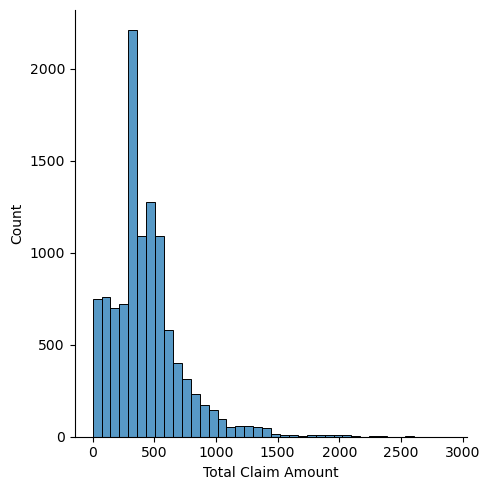

In [79]:
sns.displot(data['Total Claim Amount'], bins=40) 
plt.show()

In [81]:
range_total_claim_amount = max(data['Total Claim Amount']) - min(data['Total Claim Amount'])
range_total_claim_amount

2893.140671